# Data Analytics Project - Models

# Pair 1 -  HEROMOTOCO LSTM

---

# 1. Import required modules

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


---

# 2. Get Pair 1 Orders Dataset

## 2.1. Get the orders

In [2]:
orders_df = pd.read_csv('../../Preprocess/Pair1/Pair1_orders.csv')
orders_df.head()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
0,2018-09-04,3184.149902,2735.550049,448.599854,2.186180,SHORT
1,2018-09-05,3145.399902,2772.300049,373.099854,1.220189,FLAT
2,2018-09-06,3164.850098,2783.100098,381.750000,1.330864,FLAT
3,2018-09-07,3329.350098,2923.550049,405.800049,1.638574,SHORT
4,2018-09-10,3278.300049,2868.600098,409.699951,1.688472,SHORT


In [3]:
orders_df.tail()

,Date,HEROMOTOCO_Close,BAJAJ-AUTO_Close,Spread,zscore,Orders
54,2018-11-27,2958.149902,2599.649902,358.500000,1.033390,FLAT
55,2018-11-28,2999.149902,2603.899902,395.250000,1.503591,SHORT
56,2018-11-29,3016.800049,2724.000000,292.800049,0.192787,FLAT
57,2018-11-30,3055.199951,2745.699951,309.500000,0.406456,FLAT
58,2018-12-03,3039.899902,2736.000000,303.899902,0.334805,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

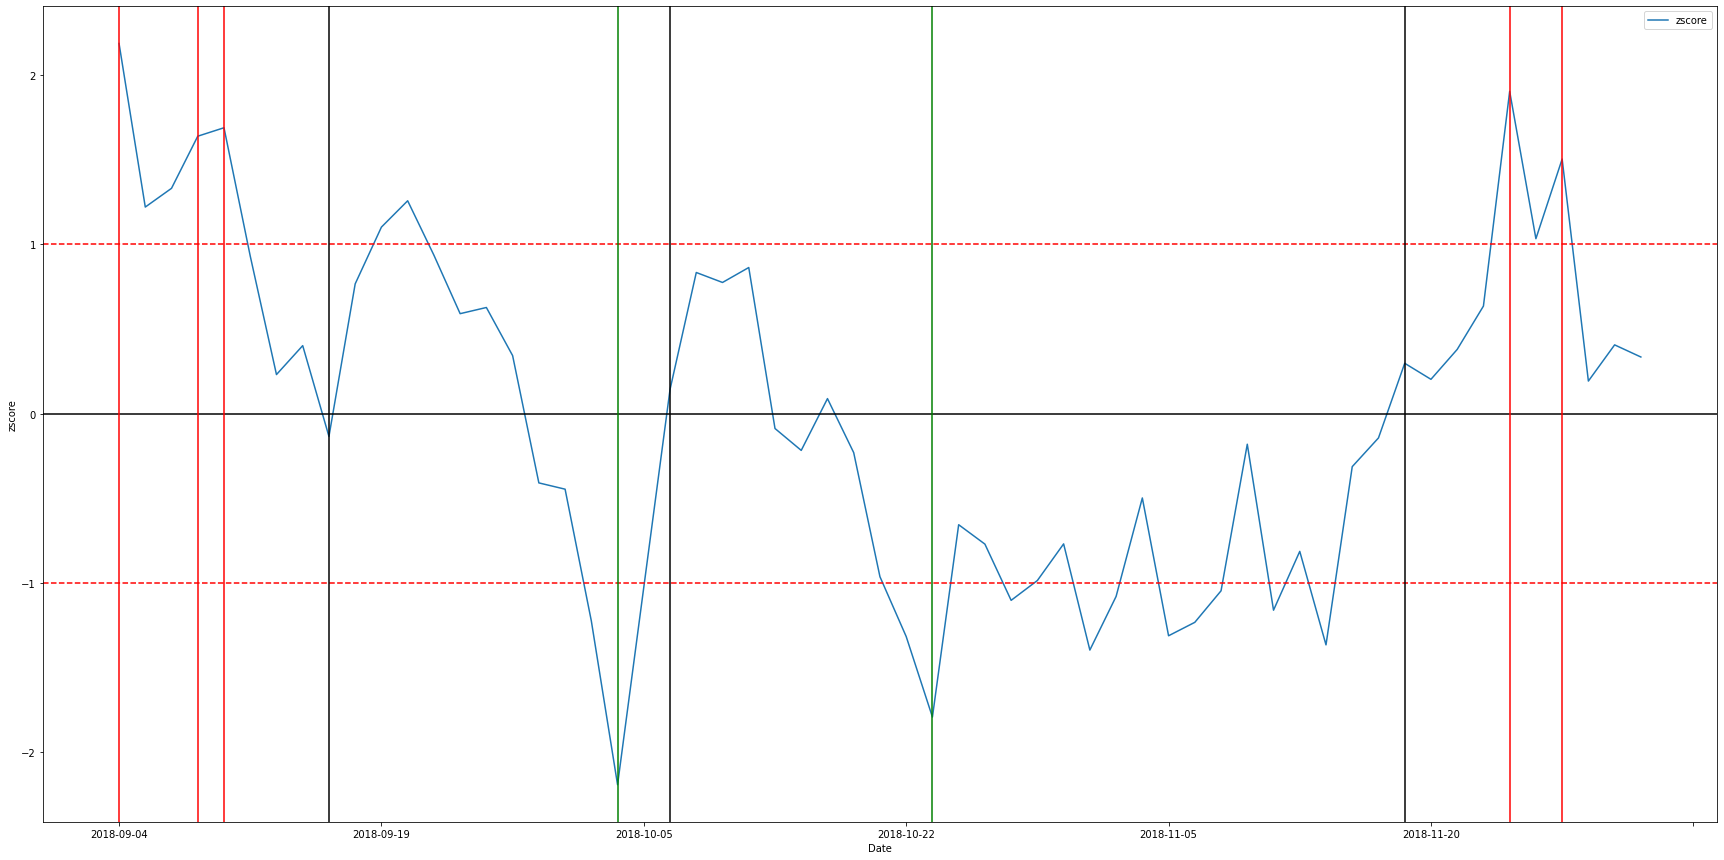

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3 Visualize the close prices of both stocks

Text(0, 0.5, 'Price')

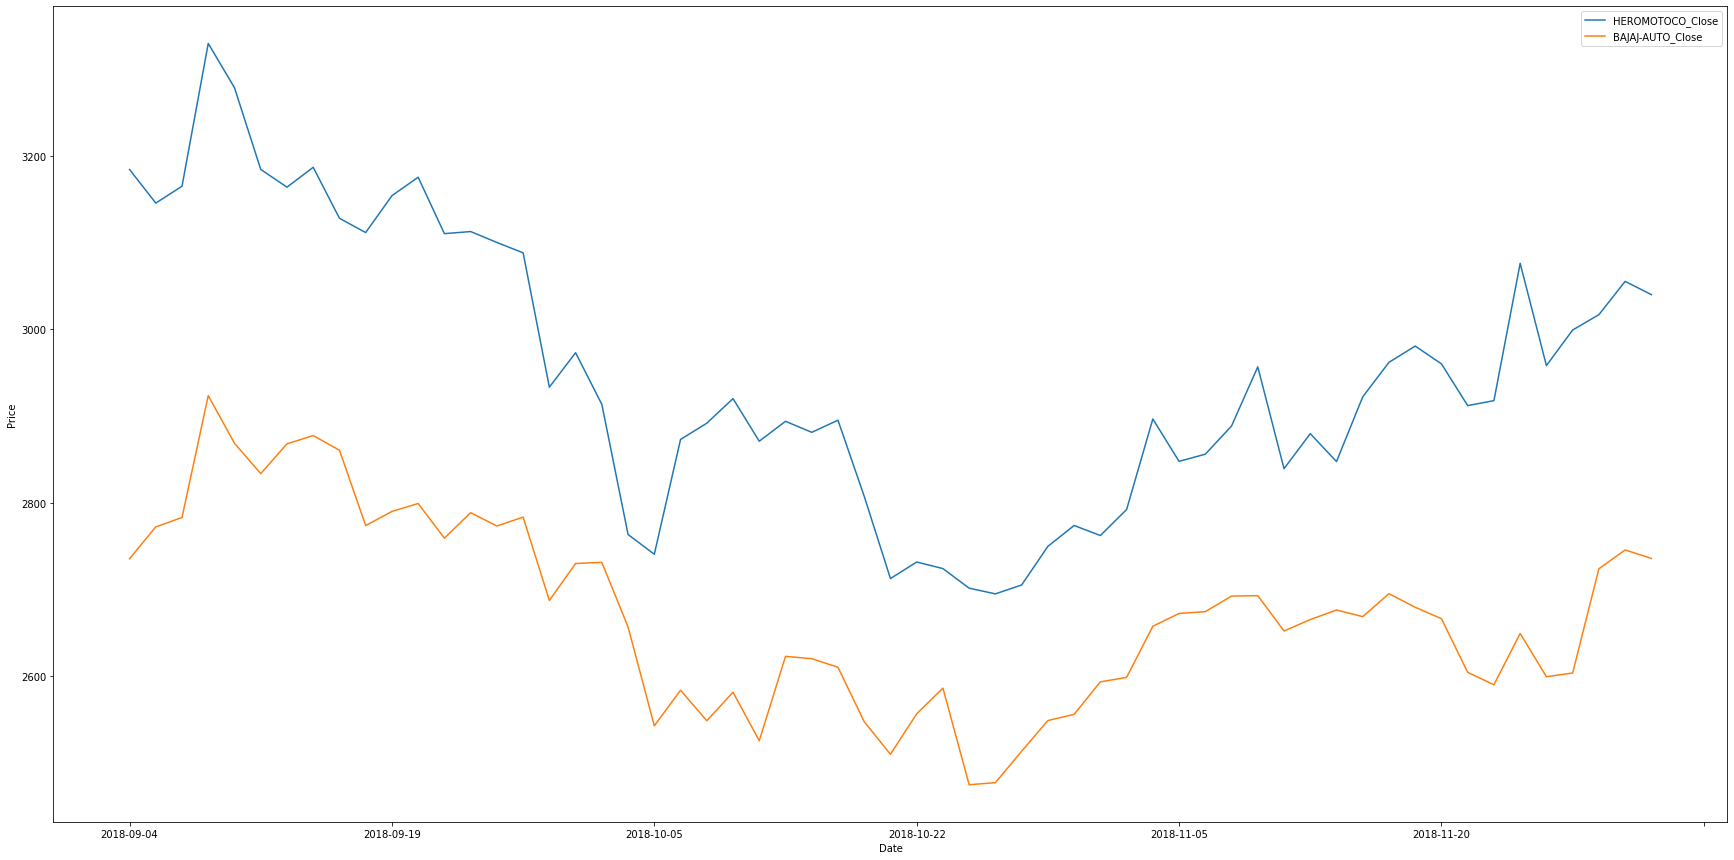

In [5]:
orders_df_plt = orders_df.plot(x='Date', y=['HEROMOTOCO_Close', 'BAJAJ-AUTO_Close'], figsize=(30,15))
orders_df_plt.set_xlabel("Date")
orders_df_plt.set_ylabel("Price")

---

# 3.  Linear Regression Model

## 3.1. Get the Complete  dataset

In [6]:
hero_df = pd.read_csv("../../Storage/Companies_with_names_exchange/HEROMOTOCONSE.csv")
hero_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Company,Exchange
0,2017-01-02,3068.949951,2992.550049,3042.000000,3030.550049,213654.0,2625.101074,HEROMOTOCO,NSE
1,2017-01-03,3016.149902,2962.550049,2978.000000,2986.550049,454277.0,2586.987549,HEROMOTOCO,NSE
2,2017-01-04,3017.300049,2971.000000,2999.000000,3004.899902,396816.0,2602.882568,HEROMOTOCO,NSE
3,2017-01-05,3083.800049,3012.949951,3034.899902,3071.750000,383925.0,2660.788574,HEROMOTOCO,NSE
4,2017-01-06,3119.000000,3052.000000,3085.000000,3067.550049,266915.0,2657.150635,HEROMOTOCO,NSE


- We can see that we have data from 2017-01-02

## 3.2. Get  training data

### 3.2.1 Get complete hero dataset

In [7]:
hero_df = hero_df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Company', 'Exchange'])
hero_df.head()

,Date,Close
0,2017-01-02,3030.550049
1,2017-01-03,2986.550049
2,2017-01-04,3004.899902
3,2017-01-05,3071.750000
4,2017-01-06,3067.550049


- We can see that the period where the stocks are correlated and co-integration starts from 2018-09-04.
- Thus the test data for which we need to make predictions is from 2018-09-04 to when the period ends at 2018-12-03.
- We take 1 year's worth of training data for our model, which means that the time period of our training data is from 2017-09-03 to 2018-09-04.


### 3.2.2. Crop dataset within training range

In [8]:
hero_df_train = hero_df[hero_df['Date'] >= '2017-09-03']
hero_df_train.head()

,Date,Close
166,2017-09-04,3978.899902
167,2017-09-05,3970.449951
168,2017-09-06,3950.649902
169,2017-09-07,3982.899902
170,2017-09-08,3956.050049


In [9]:
hero_df_train = hero_df_train[hero_df_train['Date'] <= '2018-09-04']
hero_df_train.tail()

,Date,Close
412,2018-08-29,3246.100098
413,2018-08-30,3223.699951
414,2018-08-31,3253.800049
415,2018-09-03,3242.449951
416,2018-09-04,3184.149902


### 3.2.3 Get the training data

In [10]:
hero_train = hero_df_train.copy()

In [11]:
hero_train = hero_train.reset_index(drop=True)
hero_train = hero_train.copy()
hero_train.head()

,Date,Close
0,2017-09-04,3978.899902
1,2017-09-05,3970.449951
2,2017-09-06,3950.649902
3,2017-09-07,3982.899902
4,2017-09-08,3956.050049


In [12]:
hero_train_plot_copy = hero_train.copy()
hero_train.tail()

,Date,Close
246,2018-08-29,3246.100098
247,2018-08-30,3223.699951
248,2018-08-31,3253.800049
249,2018-09-03,3242.449951
250,2018-09-04,3184.149902


In [13]:
hero_train = hero_train.drop(columns=['Date'])
hero_train = hero_train.values
hero_train

array([[3978.89990234],
       [3970.44995117],
       [3950.64990234],
       [3982.89990234],
       [3956.05004883],
       [3944.5       ],
       [3918.89990234],
       [3893.55004883],
       [3891.25      ],
       [3888.        ],
       [3949.89990234],
       [3944.25      ],
       [3856.05004883],
       [3896.39990234],
       [3791.14990234],
       [3755.94995117],
       [3787.75      ],
       [3727.39990234],
       [3740.05004883],
       [3774.55004883],
       [3806.25      ],
       [3794.89990234],
       [3755.44995117],
       [3703.94995117],
       [3676.39990234],
       [3695.25      ],
       [3689.55004883],
       [3751.        ],
       [3763.85009766],
       [3776.64990234],
       [3789.05004883],
       [3753.        ],
       [3735.60009766],
       [3791.25      ],
       [3755.39990234],
       [3769.64990234],
       [3750.85009766],
       [3786.64990234],
       [3833.        ],
       [3849.89990234],
       [3819.35009766],
       [3735.850

In [14]:
len(hero_train)

251

## 3.3. Get  Test Data

In [15]:
hero_test = hero_df[(hero_df['Date'] >= '2018-09-04') & (hero_df['Date'] <= '2018-12-03')].copy()
hero_test.head()

,Date,Close
416,2018-09-04,3184.149902
417,2018-09-05,3145.399902
418,2018-09-06,3164.850098
419,2018-09-07,3329.350098
420,2018-09-10,3278.300049


In [16]:
hero_test.tail()

,Date,Close
470,2018-11-27,2958.149902
471,2018-11-28,2999.149902
472,2018-11-29,3016.800049
473,2018-11-30,3055.199951
474,2018-12-03,3039.899902


In [17]:
hero_test.reset_index(drop=True, inplace=True)
hero_test.index += 251
hero_test.head()

,Date,Close
251,2018-09-04,3184.149902
252,2018-09-05,3145.399902
253,2018-09-06,3164.850098
254,2018-09-07,3329.350098
255,2018-09-10,3278.300049


In [18]:
hero_test_plot_copy = hero_test.copy()
hero_test = hero_test.drop(columns=['Date'])
hero_test = hero_test.values
hero_test

array([[3184.14990234],
       [3145.39990234],
       [3164.85009766],
       [3329.35009766],
       [3278.30004883],
       [3184.19995117],
       [3163.75      ],
       [3186.64990234],
       [3127.89990234],
       [3111.44995117],
       [3153.94995117],
       [3175.19995117],
       [3110.19995117],
       [3112.60009766],
       [3100.05004883],
       [3088.10009766],
       [2933.25      ],
       [2973.        ],
       [2913.5       ],
       [2763.5       ],
       [2740.75      ],
       [2873.05004883],
       [2891.75      ],
       [2920.10009766],
       [2871.        ],
       [2893.94995117],
       [2881.25      ],
       [2895.19995117],
       [2807.55004883],
       [2712.75      ],
       [2731.80004883],
       [2724.25      ],
       [2701.64990234],
       [2695.10009766],
       [2705.35009766],
       [2749.85009766],
       [2773.89990234],
       [2762.35009766],
       [2792.25      ],
       [2896.60009766],
       [2847.80004883],
       [2856.050

In [19]:
len(hero_test)

59

## 3.4 Create and Train  Model

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(hero_train)
scaled_train_data

array([[0.99542674],
       [0.98576579],
       [0.9631281 ],
       [1.        ],
       [0.96930217],
       [0.95609683],
       [0.92682787],
       [0.89784501],
       [0.89521533],
       [0.89149956],
       [0.96227062],
       [0.955811  ],
       [0.85497071],
       [0.90110329],
       [0.78076943],
       [0.74052481],
       [0.77688227],
       [0.70788312],
       [0.72234622],
       [0.76179057],
       [0.79803359],
       [0.78505686],
       [0.73995315],
       [0.68107245],
       [0.64957408],
       [0.67112567],
       [0.66460883],
       [0.73486546],
       [0.74955716],
       [0.76419136],
       [0.77836863],
       [0.73715209],
       [0.71725852],
       [0.78088387],
       [0.73989593],
       [0.75618816],
       [0.73469407],
       [0.77562451],
       [0.82861725],
       [0.84793916],
       [0.81301112],
       [0.71754435],
       [0.66403717],
       [0.66380857],
       [0.65540509],
       [0.58800675],
       [0.55965249],
       [0.568

In [21]:
X_train, y_train = [], []
for i in range(10,len(hero_train)):
    X_train.append(scaled_train_data[i-10:i,0])
    y_train.append(scaled_train_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [22]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 2s - loss: 0.0211


## 3.5. Get predictions

In [24]:
scaled_test_data = hero_test.reshape(-1,1)
scaled_test_data = scaler.transform(scaled_test_data)
scaled_test_data.shape

(59, 1)

In [25]:
X_test = []
for i in range(10, scaled_test_data.shape[0]):
    X_test.append(scaled_test_data[i-10:i,0])
X_test = np.array(X_test)
X_test

array([[ 0.08677747,  0.04247403,  0.06471172,  0.25278697,  0.1944207 ,
         0.08683469,  0.06345396,  0.08963575,  0.02246602,  0.00365855],
       [ 0.04247403,  0.06471172,  0.25278697,  0.1944207 ,  0.08683469,
         0.06345396,  0.08963575,  0.02246602,  0.00365855,  0.05224942],
       [ 0.06471172,  0.25278697,  0.1944207 ,  0.08683469,  0.06345396,
         0.08963575,  0.02246602,  0.00365855,  0.05224942,  0.07654486],
       [ 0.25278697,  0.1944207 ,  0.08683469,  0.06345396,  0.08963575,
         0.02246602,  0.00365855,  0.05224942,  0.07654486,  0.00222941],
       [ 0.1944207 ,  0.08683469,  0.06345396,  0.08963575,  0.02246602,
         0.00365855,  0.05224942,  0.07654486,  0.00222941,  0.00497353],
       [ 0.08683469,  0.06345396,  0.08963575,  0.02246602,  0.00365855,
         0.05224942,  0.07654486,  0.00222941,  0.00497353, -0.00937512],
       [ 0.06345396,  0.08963575,  0.02246602,  0.00365855,  0.05224942,
         0.07654486,  0.00222941,  0.00497353

In [26]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
len(closing_price)

49

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(hero_test[10:], closing_price))
print('Mean Squared Error:', metrics.mean_squared_error(hero_test[10:], closing_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(hero_test[10:], closing_price)))

Mean Absolute Error: 119.98534658003827
Mean Squared Error: 22507.772583322865
Root Mean Squared Error: 150.02590637394218


## 3.6. Visualize the predicitons vs test data

In [28]:
closing_price_df = pd.DataFrame(closing_price, columns=['price'])
closing_price_df.index += 260
closing_price = closing_price_df['price']
closing_price

260    3245.675293
261    3238.797363
262    3235.474854
263    3228.941162
264    3214.130127
265    3202.177002
266    3194.467285
267    3179.262695
268    3160.234131
269    3140.030762
270    3111.018799
271    3074.118408
272    3041.167725
273    3017.248047
274    2999.616455
275    2985.382812
276    2975.287842
277    2974.253174
278    2972.605957
279    2970.396484
280    2967.617676
281    2960.963135
282    2945.108398
283    2926.865967
284    2907.115234
285    2891.032715
286    2877.582275
287    2869.182373
288    2863.079590
289    2864.473877
290    2876.769043
291    2889.547119
292    2903.293213
293    2919.248291
294    2938.716553
295    2953.281738
296    2963.931885
297    2970.409180
298    2978.750000
299    2988.274414
300    2995.595215
301    3006.051514
302    3013.465332
303    3017.493652
304    3025.135742
305    3036.823242
306    3046.451172
307    3058.046387
308    3067.822510
Name: price, dtype: float32

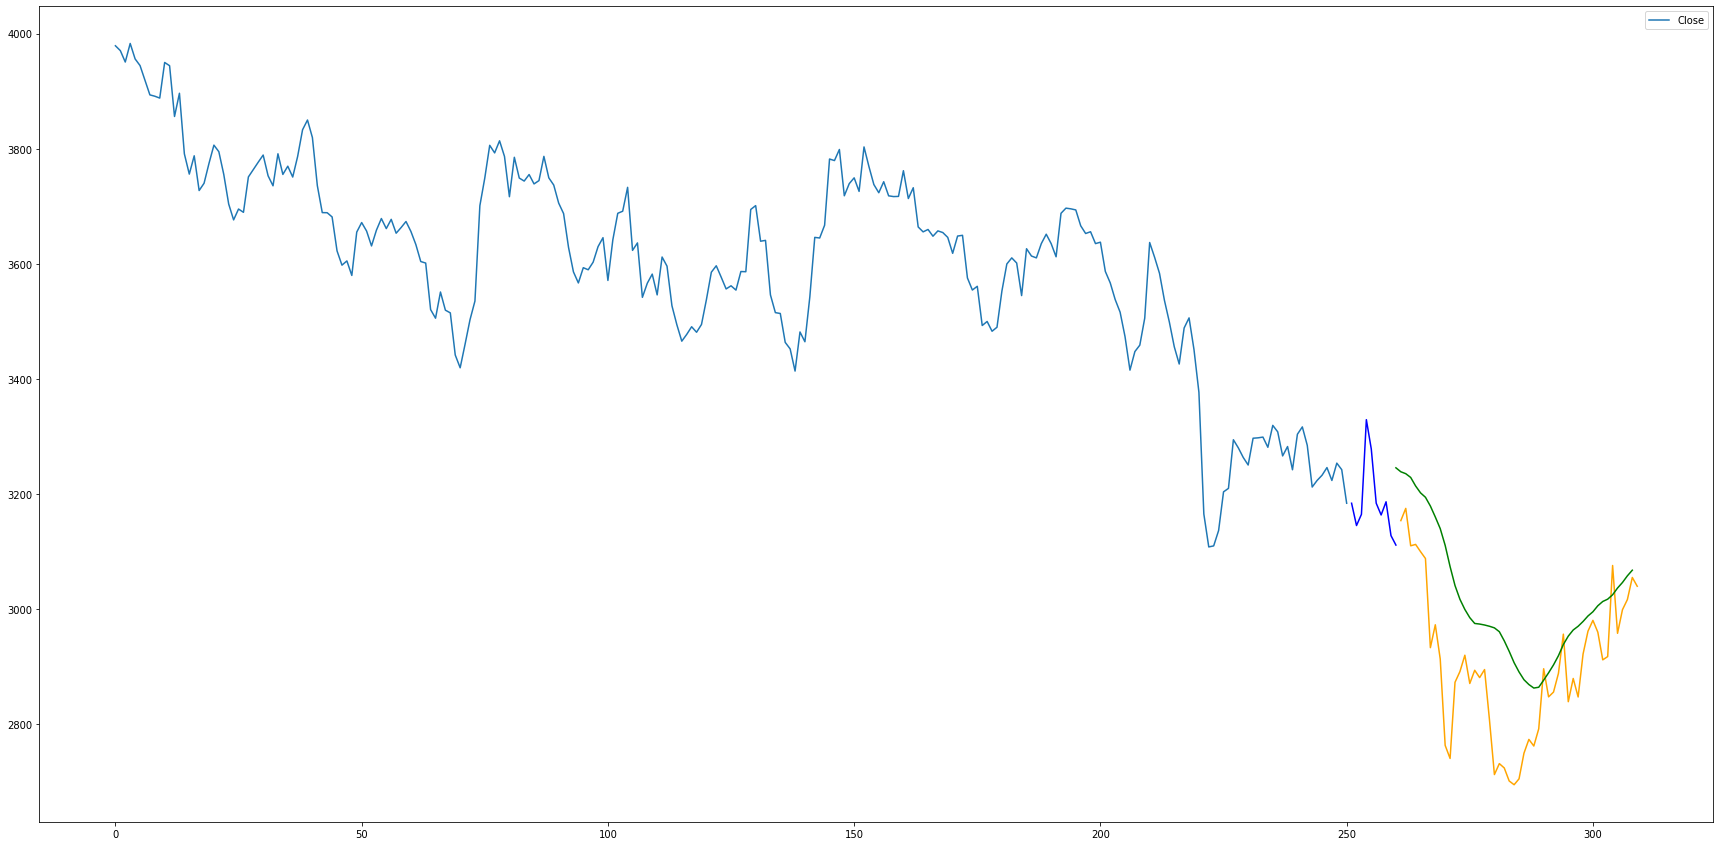

In [29]:
hero_model_plt = hero_train_plot_copy.plot(y=['Close'], figsize=(30,15))
hero_model_plt.plot(hero_test_plot_copy["Close"][:10], c='blue')
hero_model_plt.plot(hero_test_plot_copy["Close"][10:], c='orange')
hero_model_plt.plot(closing_price, c='green')

__In the graph above:__
- We can see the training data in blue
- The test data in orange
- The predictions made by the models in green

# 4. Put the results in a file

In [30]:
hero_predictions_df = pd.read_csv('Hero_predicitions.csv')
hero_predictions_df.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-09-04,3184.149902,3275.607148,3188.349761,NaN
1,2018-09-05,3145.399902,3271.913457,3184.550985,NaN
2,2018-09-06,3164.850098,3268.219767,3207.120261,NaN
3,2018-09-07,3329.350098,3264.526076,3202.465613,NaN
4,2018-09-10,3278.300049,3257.640557,3180.685059,NaN


In [31]:
hero_predictions_df.tail()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
54,2018-11-27,2958.149902,3074.064276,2829.157805,3045.2615
55,2018-11-28,2999.149902,3070.370585,2819.905033,3054.4177
56,2018-11-29,3016.800049,3066.676895,2824.088484,3062.1770
57,2018-11-30,3055.199951,3097.048584,2838.048478,3071.0837
58,2018-12-03,3039.899902,3118.542352,2827.259386,3079.7830


In [32]:
closing_price_df.index -= 250
closing_price_df

,price
10,3245.675293
11,3238.797363
12,3235.474854
13,3228.941162
14,3214.130127
15,3202.177002
16,3194.467285
17,3179.262695
18,3160.234131
19,3140.030762


In [33]:
hero_predictions_df['LSTM_Close'] = closing_price_df['price']
hero_predictions_df

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-09-04,3184.149902,3275.607148,3188.349761,NaN
1,2018-09-05,3145.399902,3271.913457,3184.550985,NaN
2,2018-09-06,3164.850098,3268.219767,3207.120261,NaN
3,2018-09-07,3329.350098,3264.526076,3202.465613,NaN
4,2018-09-10,3278.300049,3257.640557,3180.685059,NaN
5,2018-09-11,3184.199951,3253.946866,3152.847683,NaN
6,2018-09-12,3163.750000,3250.253176,3067.998656,NaN
7,2018-09-14,3186.649902,3242.865795,3040.875105,NaN
8,2018-09-17,3127.899902,3235.980276,3050.556148,NaN
9,2018-09-18,3111.449951,3232.286585,3064.160388,NaN


In [34]:
hero_predictions_df.to_csv('Hero_predicitions.csv', index=False)